# Castañas

En este documento se va a crear un modelo para las castañas para su posterior análisis con XAI

## Carga de datos ya aumentados

In [1]:
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataset_dir = '/kaggle/input/castanas-aug-ds/castanas_aug_ds'

train, val = keras.utils.image_dataset_from_directory (
    directory=dataset_dir,
    batch_size=32,
    shuffle=True,
    labels="inferred" ,
    class_names= ["no_comible", "comible"],
    label_mode='binary',
    color_mode='rgb',
    image_size=(256,256),
    validation_split=0.2,
    subset='both',
    seed=69,
    )


Found 2186 files belonging to 2 classes.
Using 1749 files for training.
Using 437 files for validation.


In [5]:
def ver_imgs(dataset: tf.data.Dataset):
    clases = ['no comible', 'comible']
    plt.figure(figsize=(5,5))
    # plt.subplots_adjust(hspace=10)

    imgs, labels = next(iter(dataset.take(1)))

    for i in range(3):
        img, label = imgs[i], labels[i]
        ax = plt.subplot(1,3,i+1)
        ax.set_axis_off()
        plt.imshow( img.numpy().astype('uint8') )
        plt.title ( clases[int(label.numpy()[0])])


    plt.tight_layout()
    plt.show()
        

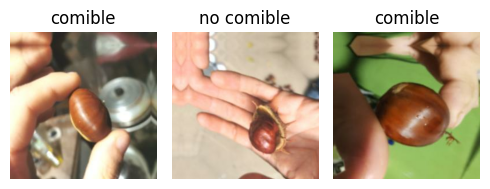

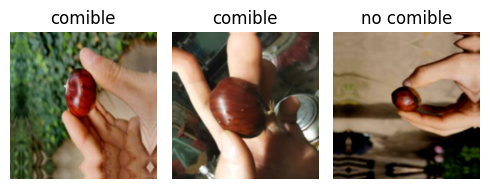

In [6]:
ver_imgs(train)
ver_imgs(val)

## Modelo CNN

In [7]:
modificar_img = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomTranslation(0.1, 0.1),
    keras.layers.RandomContrast(0.2)
])

In [8]:
model = keras.Sequential([
    keras.Input(shape=(256, 256, 3)),
    keras.layers.Rescaling(1./255),
    modificar_img, 
    #1
    #agregado kernel_regularizer=keras.regularizers.l2(0.001)
    keras.layers.Conv2D( filters=32, kernel_size=(5,5)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #2
    keras.layers.Conv2D( filters=64, kernel_size=(7,7)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #3
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #4
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #5
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    
    #agregado drop 0.2->0.4, kernel_regularizer=keras.regularizers.l2(0.001)
    keras.layers.Flatten(),
    #1
    keras.layers.Dense(units= 128),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.4) ,
    #2
    keras.layers.Dense(units= 64),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.2) ,
    #3
    keras.layers.Dense(units= 32),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.2) ,
    keras.layers.Dense(units= 1, activation='sigmoid'),
],
trainable=True,
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 252, 252, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 64)        │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 428,929 (1.64 MB)

 Trainable params: 428,929 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    min_delta=0.001, #agregado
    restore_best_weights = True,
    )

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005 ),
    # optimizer='adam',
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'],
    )

In [11]:
history = model.fit(
    train,
    epochs=10, 
    validation_data=val,
    callbacks = [early_stop],
    class_weight={0: 1.5, 1: 1.0}, #agregado, utillll
)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7941 - loss: 0.5290 - val_accuracy: 0.7803 - val_loss: 0.4895
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8194 - loss: 0.4940 - val_accuracy: 0.7918 - val_loss: 0.4182
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8417 - loss: 0.4251 - val_accuracy: 0.8810 - val_loss: 0.2596
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8540 - loss: 0.4030 - val_accuracy: 0.9108 - val_loss: 0.2264
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8555 - loss: 0.4147 - val_accuracy: 0.8673 - val_loss: 0.2868
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8690 - loss: 0.3599 - val_accuracy: 0.8490 - val_loss: 0.2820
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8679 - loss: 0.3396 - val_accuracy: 0.8902 - val_loss: 0.2300
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8669 - loss: 0.3685 - val_accuracy: 0.8284 - v

In [ ]:
!mkdir -p "/kaggle/working/modelos/"
model.save("/kaggle/working/modelos/Castanas_Model_1_91.keras")

14/14 - 1s - 39ms/step - accuracy: 0.9108 - loss: 0.2264
val accuaricy: 0.9107551574707031 val loss: 0.22640566527843475


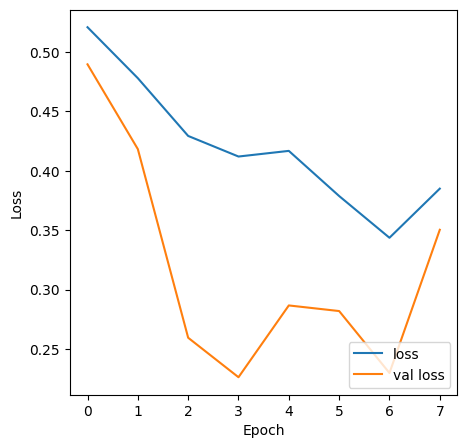

In [12]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(val, verbose=2)
print(f'val accuaricy: {val_acc} val loss: {val_loss}')